https://zenn.dev/thimblee/articles/ml_prml_perceptron

# 第7章パーセプトロン型学習規則

- パーセプトロンを実装してみる
- 適当なデータを放り込んで、識別境界の変化を見る
- パラメータの初期値を0と乱数でやってみる

In [45]:
import os
from typing import List

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [242]:
class Perceptron:
    def __init__(self, dim=1, eta=1, init_w=None):
        self.w = self.set_init_w(dim, init_w)
        
        # パラメータの変化を記録
        self.w_l = [self.w]
        assert len(self.w) == dim + 1
        # 学習率
        self.eta = eta
    
    def forward(self, x):
        return np.sign((x * model.w).sum(axis=1))
        
    def update_w(self, output, y):
        # 出力と正解データが異なる場合のみパラメータを更新
        # サンプルデータをwに加える
        self.w += np.dot((output != y) * np.sign(y), x)
        self.w_l.append(self.w)
        
    def set_init_w(self, dim, init_w):
        if init_w is None:
            # 正規分布の乱数生成
            w = np.random.randn(dim + 1)
        else:
            w = np.zeros(dim + 1)
        return w
            


In [243]:
def get_sample(dim, n):
    x = np.random.rand(n, dim) * 2 - 1
    # バイアス項を追加
    x = np.hstack((np.ones((n, 1)), x))
    
    # ラベルは[1, -1]のどっちか
    y = np.where(np.array(x[:, 1] < x[:, 2]), 1, -1)
    return x, y

In [246]:
# 特徴ベクトルの次元数
dim = 2
# サンプル数
n = 10

x, y = get_sample(dim, n)

print(x)
print(y)

# パーセプトロンのモデル定義
eta = 0.01
model = Perceptron(dim=dim, eta=eta)

[[ 1.         -0.82994458  0.43417819]
 [ 1.         -0.98013755 -0.70809928]
 [ 1.         -0.60649051  0.96551072]
 [ 1.         -0.57876616 -0.68800167]
 [ 1.          0.41333103 -0.36506763]
 [ 1.         -0.53381239  0.37419489]
 [ 1.         -0.75743577 -0.43232799]
 [ 1.          0.08665092  0.04704151]
 [ 1.         -0.29339621 -0.74651317]
 [ 1.          0.37236434 -0.08381488]]
[ 1  1  1 -1 -1  1  1 -1 -1 -1]


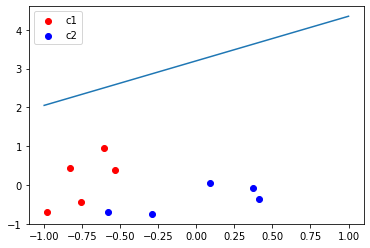

In [248]:
# サンプルを可視化してみる
# クラスで色分け
class1_cond = y >= 0
class2_cond = y < 0

plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

# 初期パラメータの識別境界を可視化
xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)

plt.legend()
plt.show()


In [249]:
# 学習回数
n_iter = 10

accuracy_l = []

for i in range(n_iter):
    print(f"iter: {i + 1}")
    output = model.forward(x)
    accuracy = np.sum(output == y) / len(y)
    print(f"accuracy: {accuracy}")
    accuracy_l.append(accuracy)

    # パラメータ更新
    model.update_w(output, y)

iter: 1
accuracy: 0.5
iter: 2
accuracy: 0.5
iter: 3
accuracy: 1.0
iter: 4
accuracy: 1.0
iter: 5
accuracy: 1.0
iter: 6
accuracy: 1.0
iter: 7
accuracy: 1.0
iter: 8
accuracy: 1.0
iter: 9
accuracy: 1.0
iter: 10
accuracy: 1.0


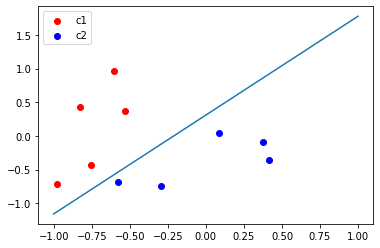

In [250]:
# 学習後の識別境界を可視化
plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)
plt.legend()
plt.show()

In [251]:
# パラメータの変化の様子
model.w_l

[array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455]),
 array([-0.84465688, -4.01116662,  2.73356455])]